# [  ]

In [1]:
import fatbot as fb
import torch.nn as nn
import numpy as np
import fatbot.db4 as db
import matplotlib.pyplot as plt
import os

# Setup

### RL Algorithm

In [2]:
sbalgo =                fb.PPO         #<----- model args depend on this
model_name =            'ppo_model2'    #<----- stores data in this folder
os.makedirs(model_name, exist_ok=True)

### Reward Scheme

In [3]:
reward_scheme = dict( 
                #dis_target_point=   1.0, 
                dis_neighbour = 1.0,
                #dis_target_radius=  1.0, 
                all_unsafe=         1.0, 
                all_neighbour=      1.0, 
                occluded_neighbour= 2.0, 
                )
delta_reward = True

### Hyperparams

In [5]:
gamma =                 0.6
horizon =               100
total_timesteps =       100_000 #<--- for training
model_version =         'base'
model_path =            os.path.join(model_name, model_version)

# learning rate scheduling
start_lr, end_lr = 0.00050, 0.000040
lr_mapper=fb.REMAP((-0.2,1), (start_lr, end_lr)) # set learn rate schedluer
def lr_schedule(progress):
  #progress_precent = 100*(1-progress)
  #lr = lr_mapper.in2map(1-progress)
  #if int(progress_precent) % 10 == 0:
  #  print(f'Progress: {progress} ~~> {progress_precent:.3f} %,  {lr = }')  
  return lr_mapper.in2map(1-progress) #lr

# Training

### prepare

In [ ]:
# initial state distribution - uniformly sample from all listed states
initial_state_keys =  db.all_states() # [db.isd[db.isd_keys[0]]] #[v for k,v in db.isd.items()] 
permute_states =        False
print(f'Total Initial States: {len(initial_state_keys)}')

# build training env
training_env = db.envF(False, horizon, reward_scheme, delta_reward, 
                        permute_states, *initial_state_keys)

#<---- optinally check
fb.check_env(training_env) 

### perform training

In [ ]:
# start training
training_start_time = fb.common.now()
print(f'Training @ [{model_path}]')
model = sbalgo(policy=      'MlpPolicy', 
        env=                training_env, 
        learning_rate =     lr_schedule,
        n_steps=            2048+1024,
        batch_size =        64+32,
        n_epochs =          20,
        gamma =             gamma,
        gae_lambda=         0.95,
        clip_range=         0.25, 
        clip_range_vf=      None, 
        normalize_advantage=True, 
        ent_coef=           0.0, 
        vf_coef=            0.5, 
        max_grad_norm=      0.5, 
        use_sde=            False, 
        sde_sample_freq=    -1, 
        target_kl=          None, 
        tensorboard_log=    None, 
        create_eval_env=    False, 
        verbose=            0, 
        seed=               None, 
        device=             'cpu', 
        _init_setup_model=  True,
        policy_kwargs=dict(
                        activation_fn=  nn.LeakyReLU, 
                        net_arch=[dict(
                            pi=[400, 300, 300, 300], 
                            vf=[400, 300, 300, 300])])) #256, 256, 256, 128, 128

model.learn(total_timesteps=total_timesteps,log_interval=int(0.1*total_timesteps))
model.save(model_path)
training_end_time = fb.common.now()
print(f'Finished!, Time-Elapsed:[{training_end_time-training_start_time}]')

# Testing

In [6]:
model = sbalgo.load(model_path)
model, model_path

(<stable_baselines3.ppo.ppo.PPO at 0x1ffed6efeb0>, 'ppo_model2\\base')

### prepare

In [7]:
# initial state distribution - uniformly sample from all listed states
initial_state_keys =    db.all_states() # [db.isd[db.isd_keys[0]]]  #[v for k,v in db.isd.items()] 
permute_states =        False
nos_initial_states=len(initial_state_keys)
print(f'Total Initial States: {nos_initial_states}')

horizon =               100
# build testing_env
testing_env = db.envF(True, horizon, reward_scheme, delta_reward, 
                        permute_states, *initial_state_keys)

# save initial state
#testing_env.reset()
#testing_env.save_state(f'{model_path}_initial.npy')
#fig=testing_env.render() # do a default render
#fig.savefig(f'{model_path}_initial.png')
#del fig

#<---- optinally check
#fb.check_env(training_env) 

Total Initial States: 11
[*] World Created :: world_db4 :: Dim: ( X=40.0, Y=40.0, H=100 )
Delta-Reward: [True],  Delta-Action: [False]
Imaging: [False],  History: [True]



c:\Program Files\Python38\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


### perform testing

Testing @ [ppo_model2\base]
[.] Testing for [11] episodes @ [inf] steps

[++] Begin Epoch: Running for 11 episodes

[+] Begin Episode: 1 of 11
  [1/False]: Reward: 0.008475303649902344
  [2/False]: Reward: 0.008536815643310547
  [3/False]: Reward: 0.008677005767822266
  [4/False]: Reward: 0.39226484298706055
  [5/False]: Reward: 0.01755523681640625
  [6/False]: Reward: 0.4031095504760742
  [7/False]: Reward: 0.024863243103027344
  [8/False]: Reward: 0.025750160217285156
  [9/False]: Reward: 0.025812625885009766
  [10/False]: Reward: 0.025522708892822266
  [11/False]: Reward: 0.02451944351196289
  [12/False]: Reward: 0.022701263427734375
  [13/False]: Reward: 0.021112918853759766
  [14/False]: Reward: 0.018996238708496094
  [15/False]: Reward: 0.01655864715576172
  [16/False]: Reward: 0.011721611022949219
  [17/False]: Reward: 0.009569168090820312
  [18/False]: Reward: 0.008994102478027344
  [19/False]: Reward: 0.007179737091064453
  [20/False]: Reward: 0.0051822662353515625
  [21/False

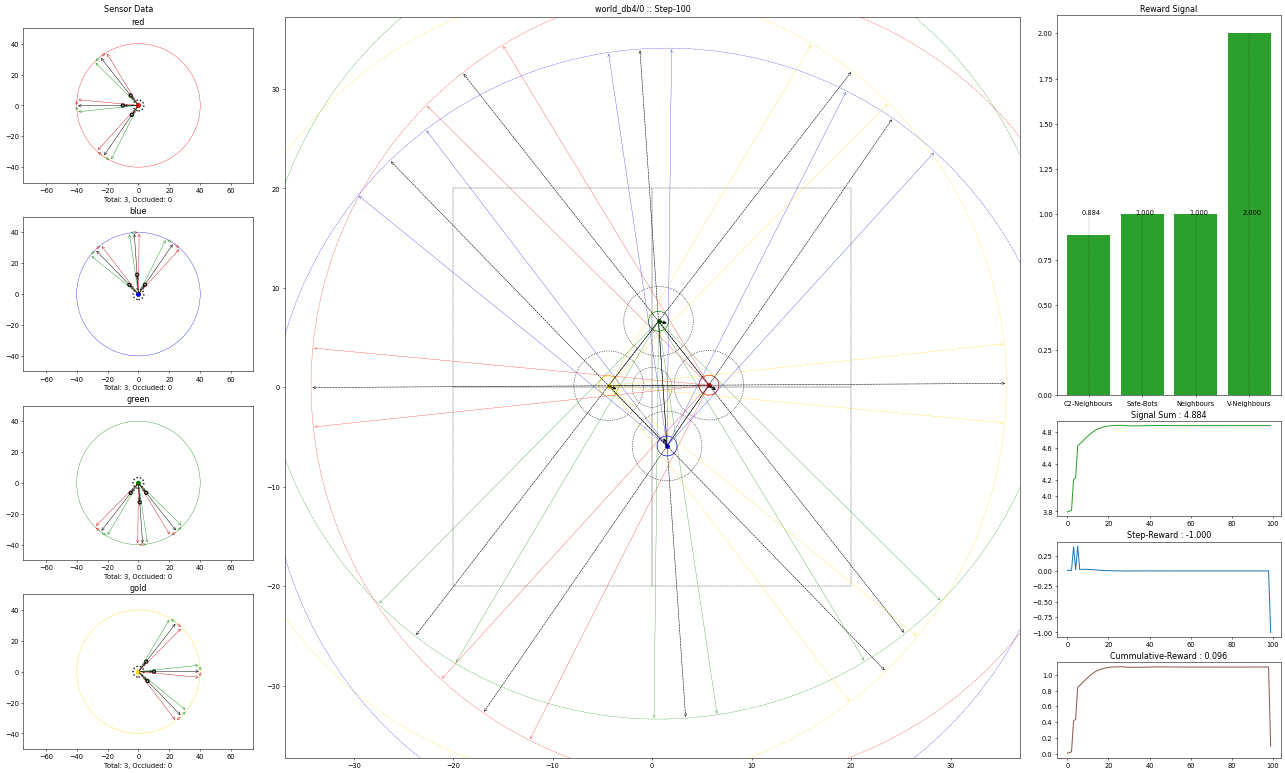

[x] End Episode: 1] :: Return: 0.09640836715698242, Steps: 100

[+] Begin Episode: 2 of 11
  [1/False]: Reward: 0.016821861267089844
  [2/False]: Reward: 0.016470909118652344
  [3/False]: Reward: 0.017225265502929688
  [4/False]: Reward: 0.017940521240234375
  [5/False]: Reward: 0.018262863159179688
  [6/False]: Reward: 0.018756866455078125
  [7/False]: Reward: 0.018527507781982422
  [8/False]: Reward: 0.01684713363647461
  [9/False]: Reward: 0.015903472900390625
  [10/False]: Reward: 0.015471935272216797
  [11/False]: Reward: 0.015964031219482422
  [12/False]: Reward: 0.015158653259277344
  [13/False]: Reward: 0.012689590454101562
  [14/False]: Reward: 0.011260032653808594
  [15/False]: Reward: 0.008580207824707031
  [16/False]: Reward: 0.005194187164306641
  [17/False]: Reward: 0.003365039825439453
  [18/False]: Reward: 0.0025153160095214844
  [19/False]: Reward: 0.0019516944885253906
  [20/False]: Reward: 0.0016727447509765625
  [21/False]: Reward: 0.0014057159423828125
  [22/False]

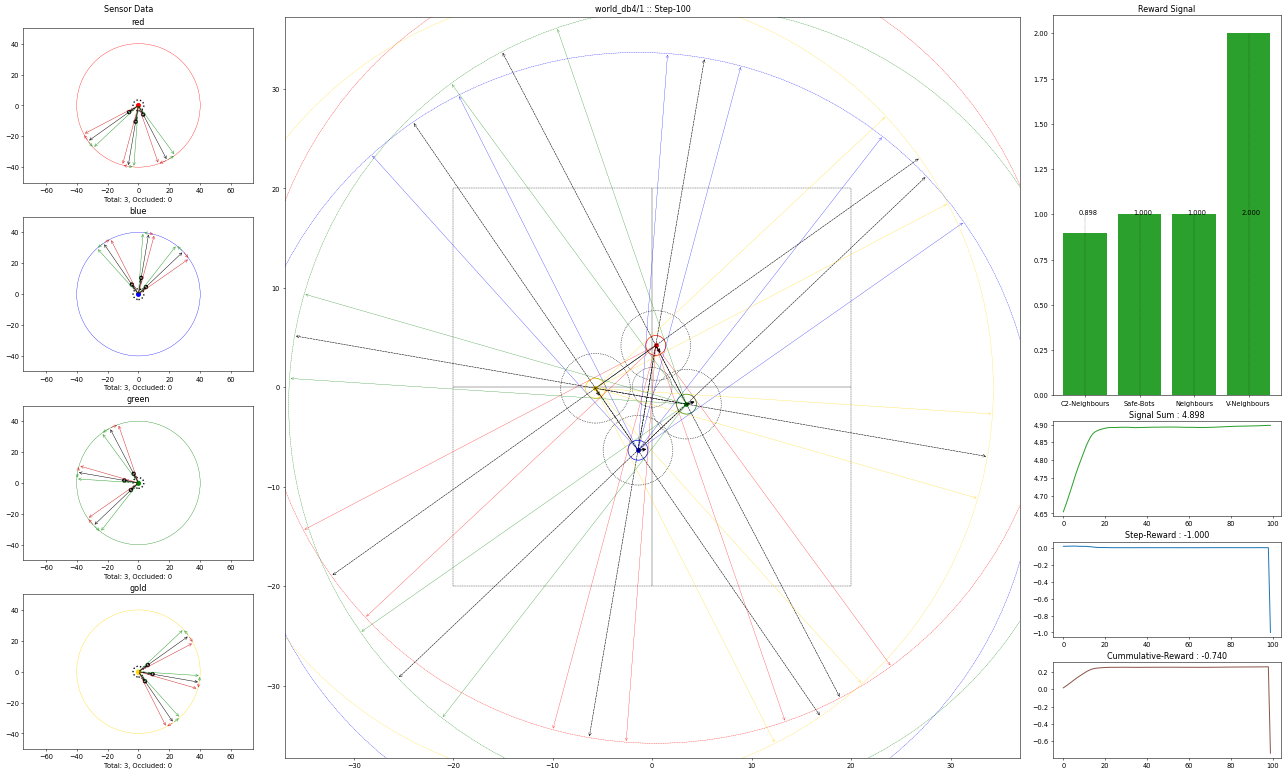

[x] End Episode: 2] :: Return: -0.7399873733520508, Steps: 100

[+] Begin Episode: 3 of 11
  [1/False]: Reward: 0.683002233505249
  [2/False]: Reward: 0.354494571685791
  [3/False]: Reward: 0.02133655548095703
  [4/False]: Reward: 0.016390323638916016
  [5/False]: Reward: 0.01141500473022461
  [6/False]: Reward: 0.011552810668945312
  [7/False]: Reward: 0.012552261352539062
  [8/False]: Reward: 0.01302480697631836
  [9/False]: Reward: 0.011749744415283203
  [10/False]: Reward: 0.008016109466552734
  [11/False]: Reward: 0.005303859710693359
  [12/False]: Reward: 0.004010200500488281
  [13/False]: Reward: 0.0034379959106445312
  [14/False]: Reward: 0.0035114288330078125
  [15/False]: Reward: 0.004248619079589844
  [16/False]: Reward: 0.004603385925292969
  [17/False]: Reward: 0.004551410675048828
  [18/False]: Reward: 0.003711223602294922
  [19/False]: Reward: 0.0032601356506347656
  [20/False]: Reward: 0.0032143592834472656
  [21/False]: Reward: 0.003212451934814453
  [22/False]: Reward

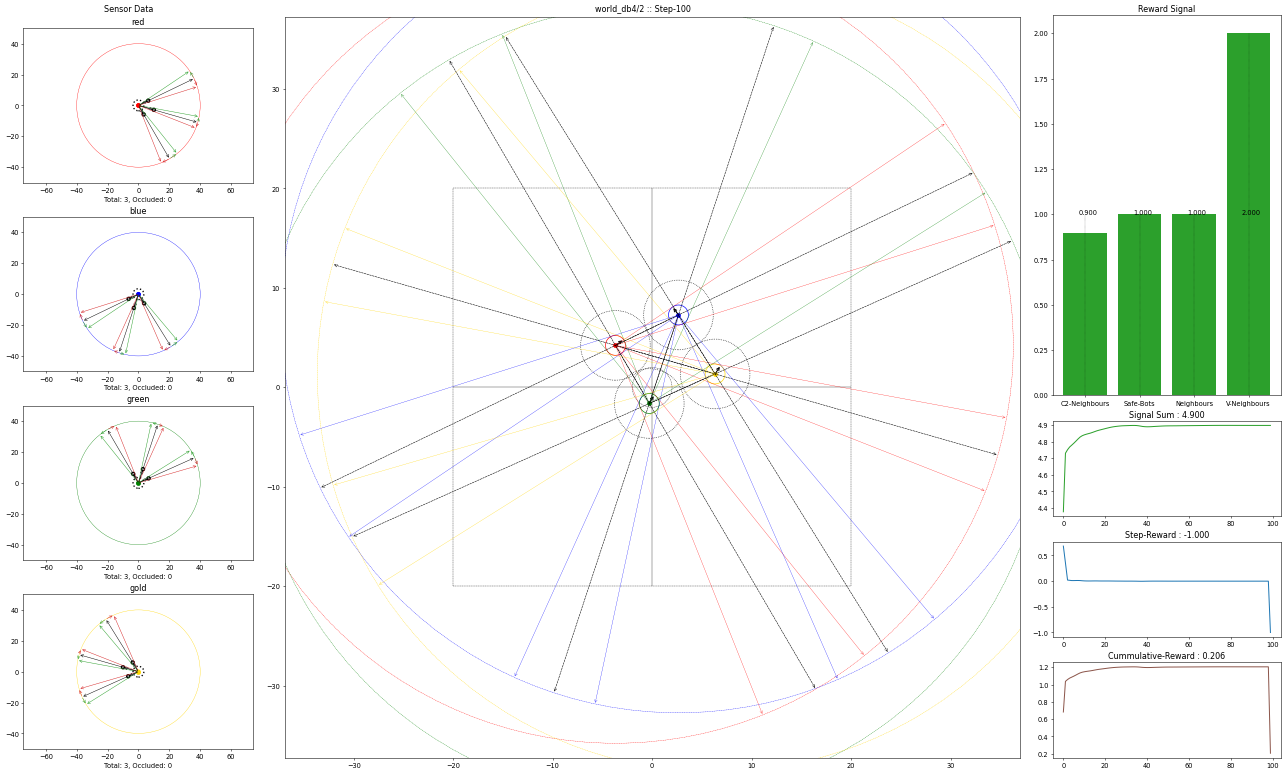

[x] End Episode: 3] :: Return: 0.2059938907623291, Steps: 100

[+] Begin Episode: 4 of 11
  [1/False]: Reward: 0.6784625053405762
  [2/False]: Reward: 0.3446173667907715
  [3/False]: Reward: 0.012089729309082031
  [4/False]: Reward: 0.015637874603271484
  [5/False]: Reward: 0.016639232635498047
  [6/False]: Reward: 0.017354965209960938
  [7/False]: Reward: 0.016962528228759766
  [8/False]: Reward: 0.014519691467285156
  [9/False]: Reward: 0.01254129409790039
  [10/False]: Reward: 0.011600971221923828
  [11/False]: Reward: 0.010185718536376953
  [12/False]: Reward: 0.0076541900634765625
  [13/False]: Reward: 0.005244255065917969
  [14/False]: Reward: 0.0033712387084960938
  [15/False]: Reward: -9.441375732421875e-05
  [16/False]: Reward: -0.0029697418212890625
  [17/False]: Reward: -0.0037527084350585938
  [18/False]: Reward: -0.00336456298828125
  [19/False]: Reward: -0.0013599395751953125
  [20/False]: Reward: -6.4849853515625e-05
  [21/False]: Reward: 0.0004801750183105469
  [22/Fals

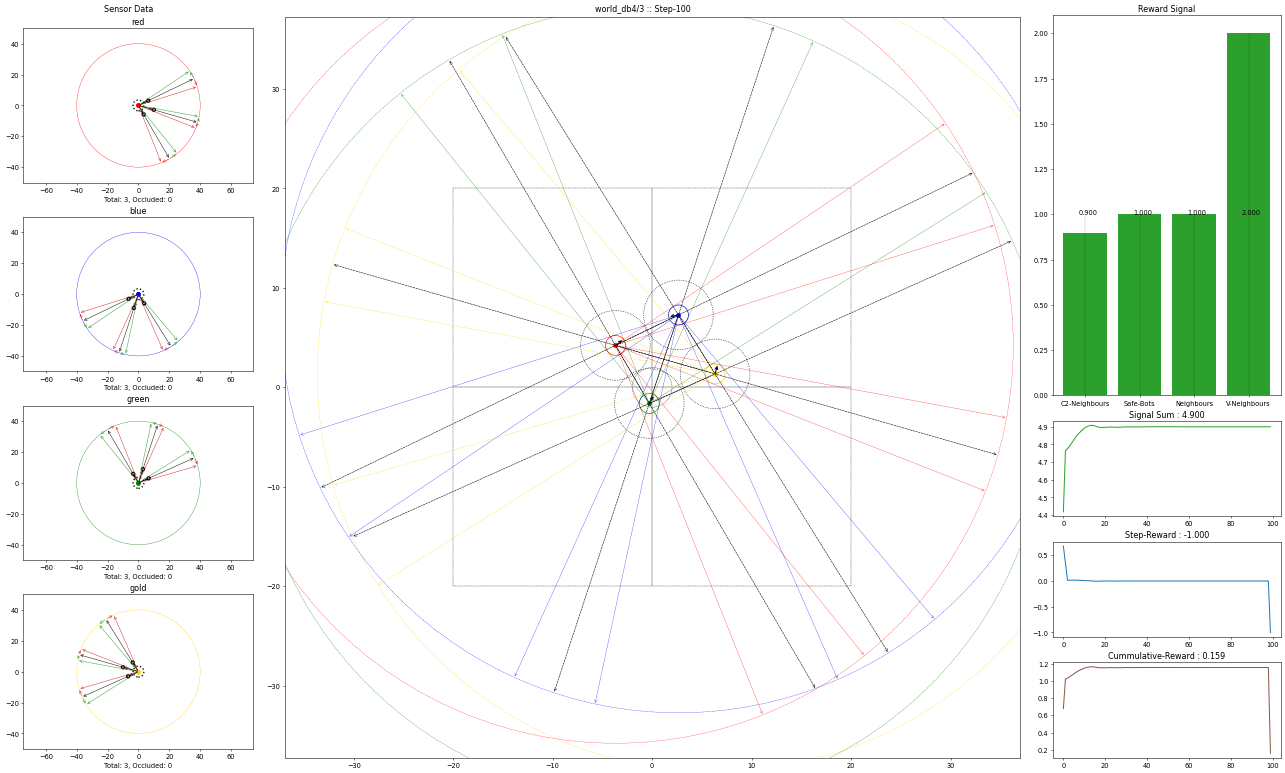

[x] End Episode: 4] :: Return: 0.1588611602783203, Steps: 100

[+] Begin Episode: 5 of 11
  [1/False]: Reward: 0.6724753379821777
  [2/False]: Reward: 0.006154060363769531
  [3/False]: Reward: 0.3979454040527344
  [4/False]: Reward: 0.01832866668701172
  [5/False]: Reward: 0.020804405212402344
  [6/False]: Reward: 0.01947164535522461
  [7/False]: Reward: 0.018802165985107422
  [8/False]: Reward: 0.01761627197265625
  [9/False]: Reward: 0.016038894653320312
  [10/False]: Reward: 0.014881134033203125
  [11/False]: Reward: 0.014085769653320312
  [12/False]: Reward: 0.013247013092041016
  [13/False]: Reward: 0.01200103759765625
  [14/False]: Reward: 0.010238170623779297
  [15/False]: Reward: 0.008603096008300781
  [16/False]: Reward: 0.007206916809082031
  [17/False]: Reward: 0.0053539276123046875
  [18/False]: Reward: 0.004393577575683594
  [19/False]: Reward: 0.0033054351806640625
  [20/False]: Reward: 0.0017604827880859375
  [21/False]: Reward: 0.001026153564453125
  [22/False]: Reward:

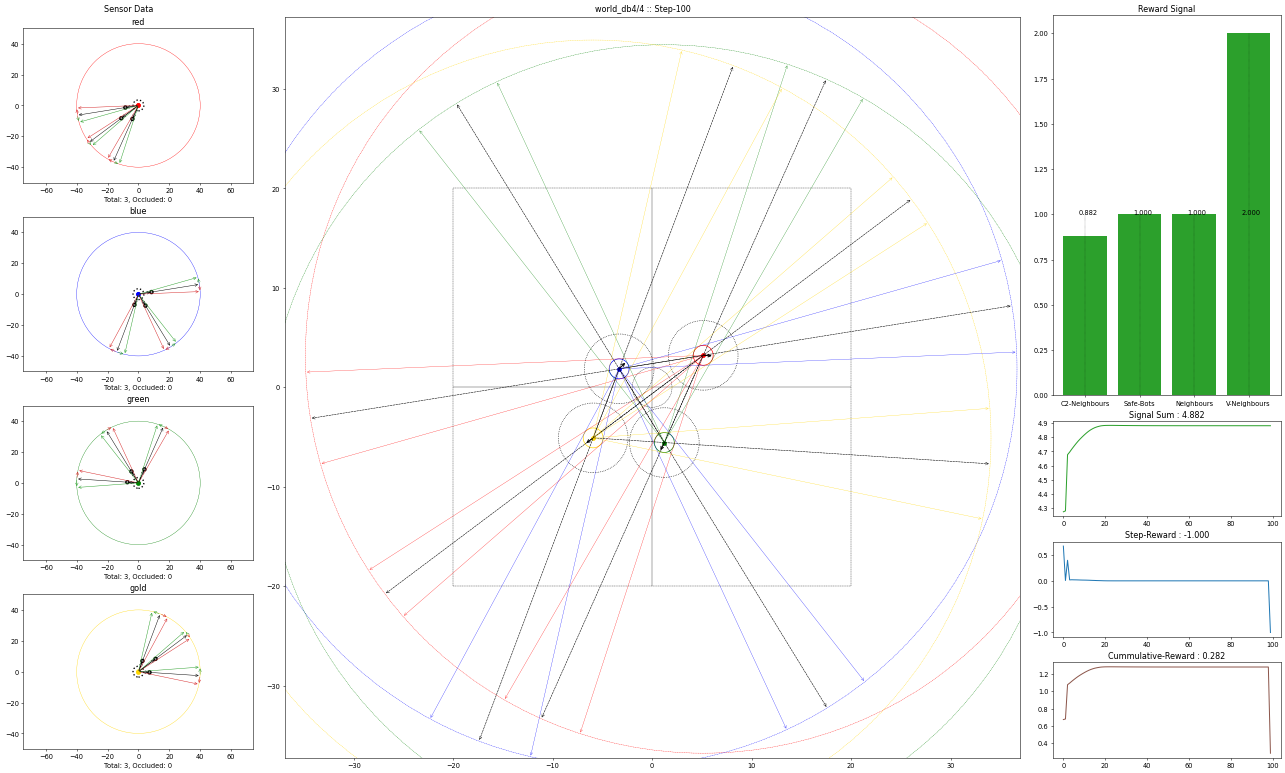

[x] End Episode: 5] :: Return: 0.2818121910095215, Steps: 100

[+] Begin Episode: 6 of 11
  [1/False]: Reward: 0.8310763835906982
  [2/False]: Reward: 0.6592025756835938
  [3/False]: Reward: 0.4968757629394531
  [4/False]: Reward: 0.17615604400634766
  [5/False]: Reward: 0.02003955841064453
  [6/False]: Reward: 0.025709152221679688
  [7/False]: Reward: 0.028532981872558594
  [8/False]: Reward: 0.02660655975341797
  [9/False]: Reward: 0.022225379943847656
  [10/False]: Reward: 0.02115631103515625
  [11/False]: Reward: 0.01863861083984375
  [12/False]: Reward: 0.015061378479003906
  [13/False]: Reward: 0.013657093048095703
  [14/False]: Reward: 0.014487743377685547
  [15/False]: Reward: 0.014139652252197266
  [16/False]: Reward: 0.01179647445678711
  [17/False]: Reward: 0.008925437927246094
  [18/False]: Reward: 0.007905960083007812
  [19/False]: Reward: 0.008480072021484375
  [20/False]: Reward: 0.009228706359863281
  [21/False]: Reward: 0.007733345031738281
  [22/False]: Reward: 0.0074

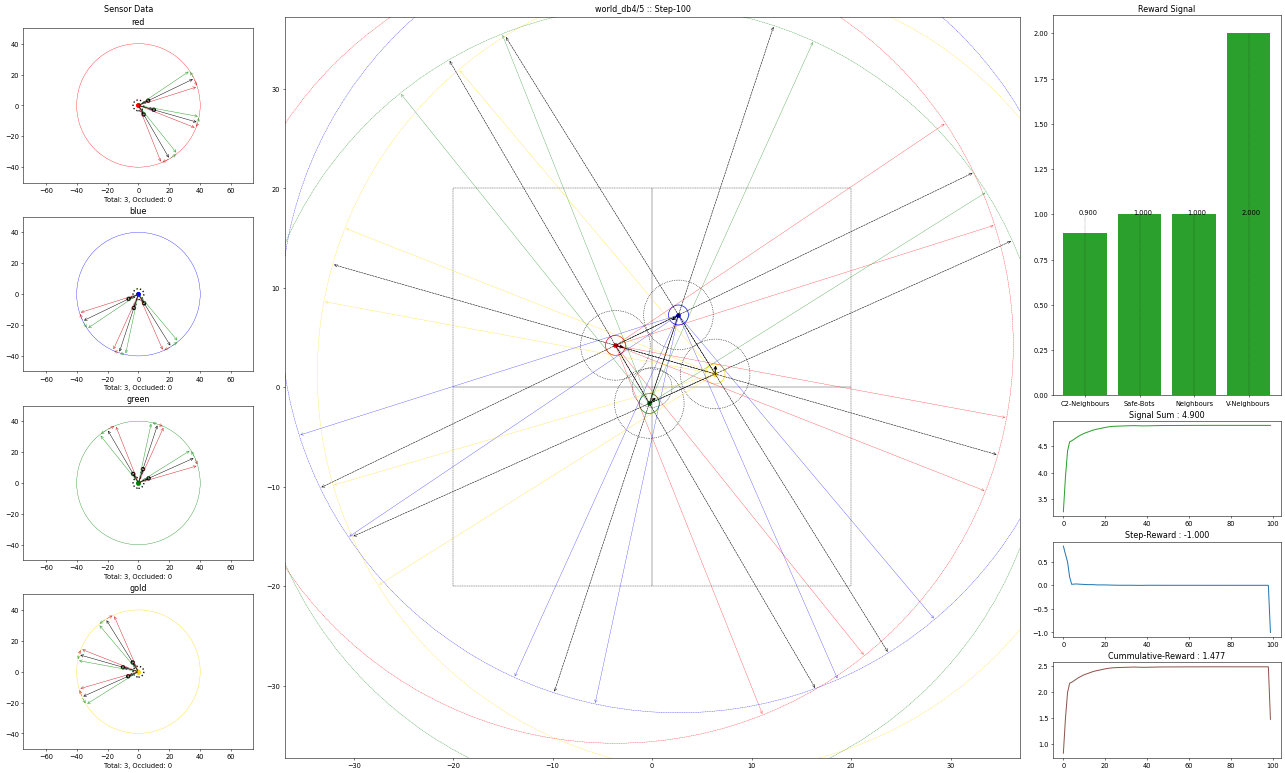

[x] End Episode: 6] :: Return: 1.476935625076294, Steps: 100

[+] Begin Episode: 7 of 11
  [1/False]: Reward: 0.5875482559204102
  [2/False]: Reward: 0.009296417236328125
  [3/False]: Reward: 0.00857686996459961
  [4/False]: Reward: 0.010023117065429688
  [5/False]: Reward: 0.016881465911865234
  [6/False]: Reward: 0.015779495239257812
  [7/False]: Reward: 0.014578819274902344
  [8/False]: Reward: 0.013749122619628906
  [9/False]: Reward: 0.014117717742919922
  [10/False]: Reward: 0.01459646224975586
  [11/False]: Reward: 0.015562057495117188
  [12/False]: Reward: 0.016401290893554688
  [13/False]: Reward: 0.017017364501953125
  [14/False]: Reward: 0.01694774627685547
  [15/False]: Reward: 0.01498556137084961
  [16/False]: Reward: 0.01311635971069336
  [17/False]: Reward: 0.011423587799072266
  [18/False]: Reward: 0.009976863861083984
  [19/False]: Reward: 0.008457183837890625
  [20/False]: Reward: 0.007354736328125
  [21/False]: Reward: 0.006370067596435547
  [22/False]: Reward: 0.005

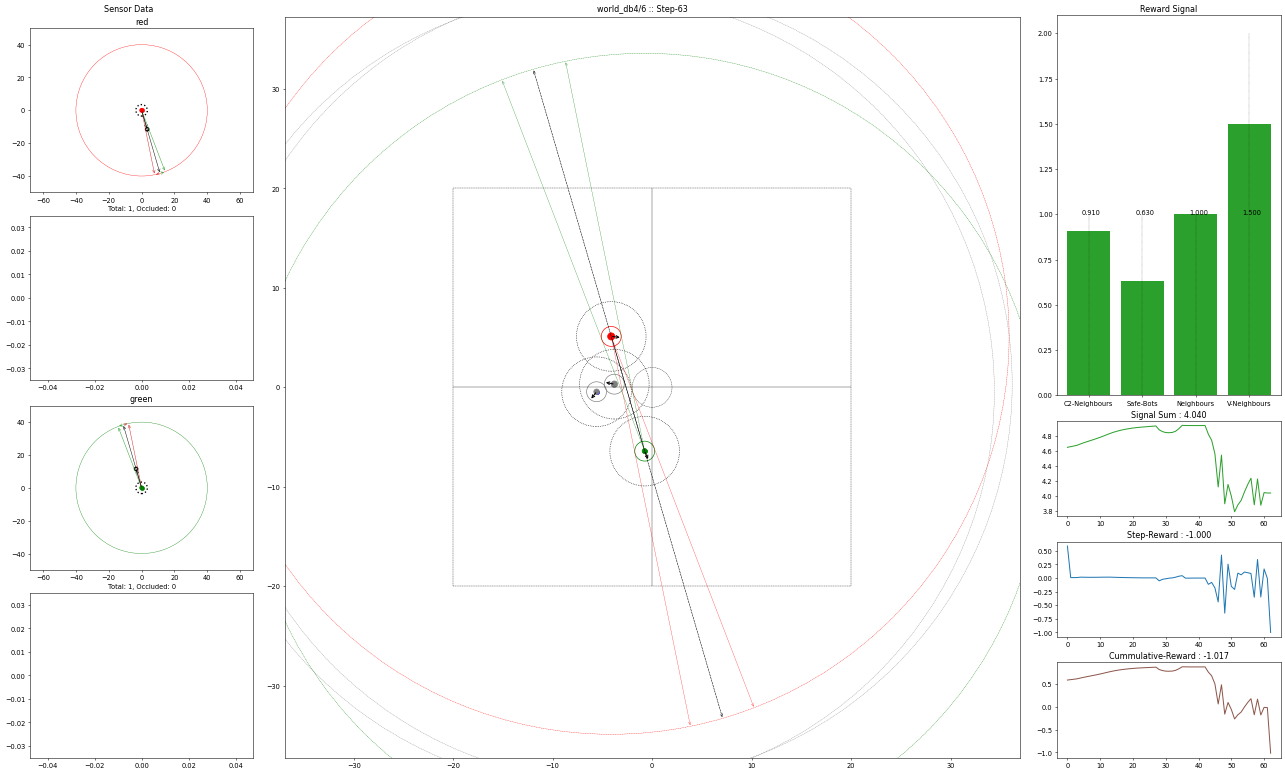

[x] End Episode: 7] :: Return: -1.0168304443359375, Steps: 63

[+] Begin Episode: 8 of 11
  [1/False]: Reward: 0.3282656669616699
  [2/False]: Reward: -0.00373077392578125
  [3/False]: Reward: 0.0034112930297851562
  [4/False]: Reward: 0.008530139923095703
  [5/False]: Reward: 0.010841846466064453
  [6/False]: Reward: 0.011438369750976562
  [7/False]: Reward: 0.011247634887695312
  [8/False]: Reward: 0.011629104614257812
  [9/False]: Reward: 0.01229238510131836
  [10/False]: Reward: 0.013066768646240234
  [11/False]: Reward: 0.007315635681152344
  [12/False]: Reward: 0.0037984848022460938
  [13/False]: Reward: 0.0011959075927734375
  [14/False]: Reward: 0.0034914016723632812
  [15/False]: Reward: 0.004840850830078125
  [16/False]: Reward: 0.006202220916748047
  [17/False]: Reward: 0.007066249847412109
  [18/False]: Reward: 0.007305145263671875
  [19/False]: Reward: 0.0070323944091796875
  [20/False]: Reward: 0.006319999694824219
  [21/False]: Reward: 0.00542449951171875
  [22/False]: R

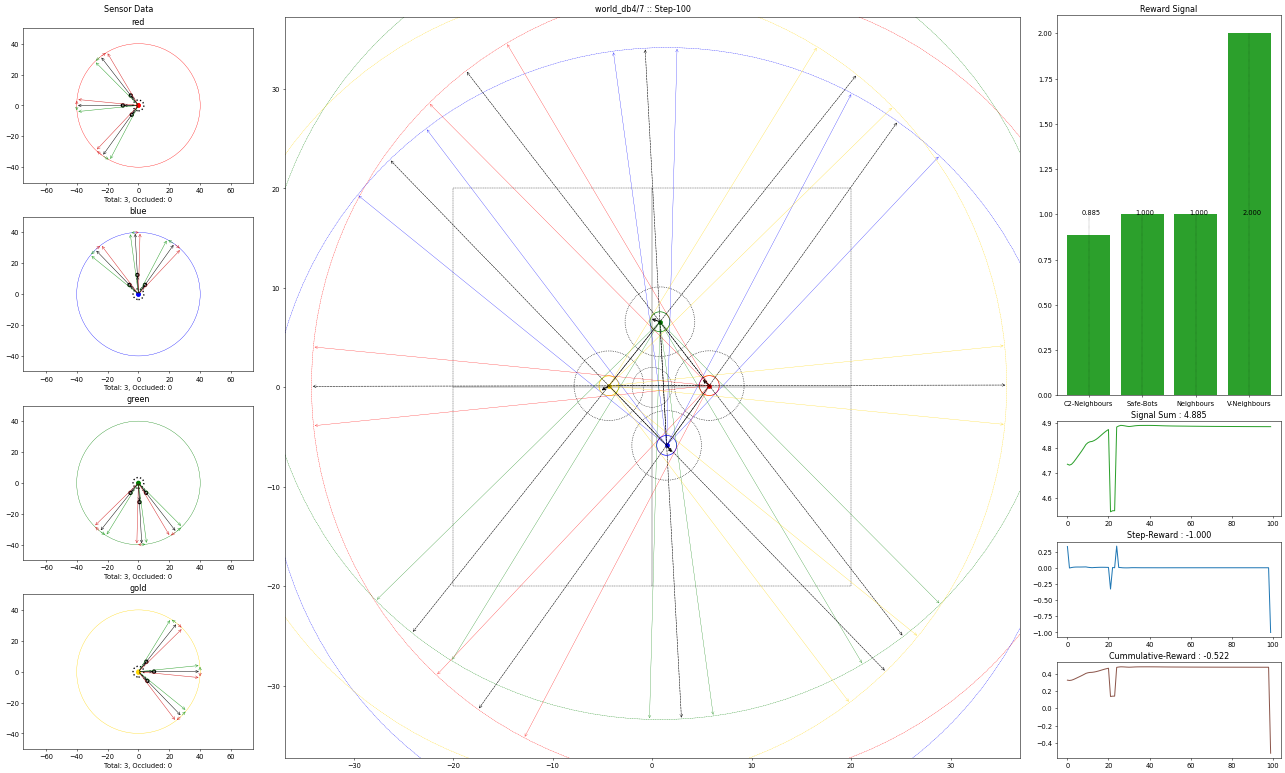

[x] End Episode: 8] :: Return: -0.521507740020752, Steps: 100

[+] Begin Episode: 9 of 11
  [1/False]: Reward: 0.31133317947387695
  [2/False]: Reward: -0.016017913818359375
  [3/False]: Reward: -0.008073806762695312
  [4/False]: Reward: 0.32601261138916016
  [5/False]: Reward: -0.008376598358154297
  [6/False]: Reward: -0.0037627220153808594
  [7/False]: Reward: -0.0027132034301757812
  [8/False]: Reward: -0.0034513473510742188
  [9/False]: Reward: -0.003429412841796875
  [10/False]: Reward: -0.0023088455200195312
  [11/False]: Reward: -0.0001354217529296875
  [12/False]: Reward: 0.0011358261108398438
  [13/False]: Reward: 0.0012907981872558594
  [14/False]: Reward: 0.0027518272399902344
  [15/False]: Reward: 0.003963470458984375
  [16/False]: Reward: 0.004778385162353516
  [17/False]: Reward: -0.32839441299438477
  [18/False]: Reward: -0.003005504608154297
  [19/False]: Reward: -0.003288745880126953
  [20/False]: Reward: -0.00296783447265625
  [21/False]: Reward: -0.00100421905517578

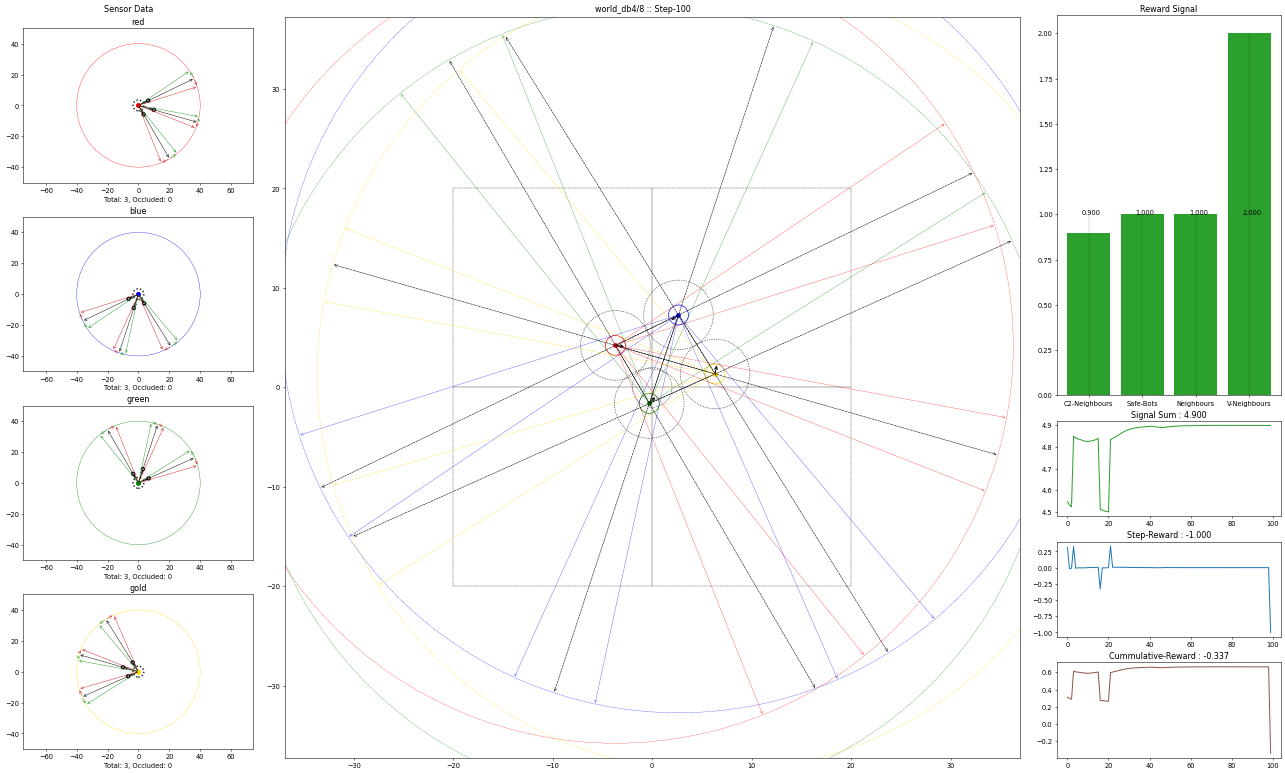

[x] End Episode: 9] :: Return: -0.3373723030090332, Steps: 100

[+] Begin Episode: 10 of 11
  [1/False]: Reward: 0.18401145935058594
  [2/False]: Reward: 0.017192363739013672
  [3/False]: Reward: 0.016650676727294922
  [4/False]: Reward: 0.017626285552978516
  [5/False]: Reward: 0.018829822540283203
  [6/False]: Reward: 0.02011585235595703
  [7/False]: Reward: 0.019957542419433594
  [8/False]: Reward: 0.017569541931152344
  [9/False]: Reward: 0.014590263366699219
  [10/False]: Reward: 0.010358810424804688
  [11/False]: Reward: 0.005931377410888672
  [12/False]: Reward: 0.0054340362548828125
  [13/False]: Reward: 0.0034422874450683594
  [14/False]: Reward: 0.0031099319458007812
  [15/False]: Reward: 0.0035877227783203125
  [16/False]: Reward: 0.005494117736816406
  [17/False]: Reward: 0.0036163330078125
  [18/False]: Reward: 0.002178192138671875
  [19/False]: Reward: 0.0013813972473144531
  [20/False]: Reward: 0.0004425048828125
  [21/False]: Reward: -0.0003848075866699219
  [22/False]:

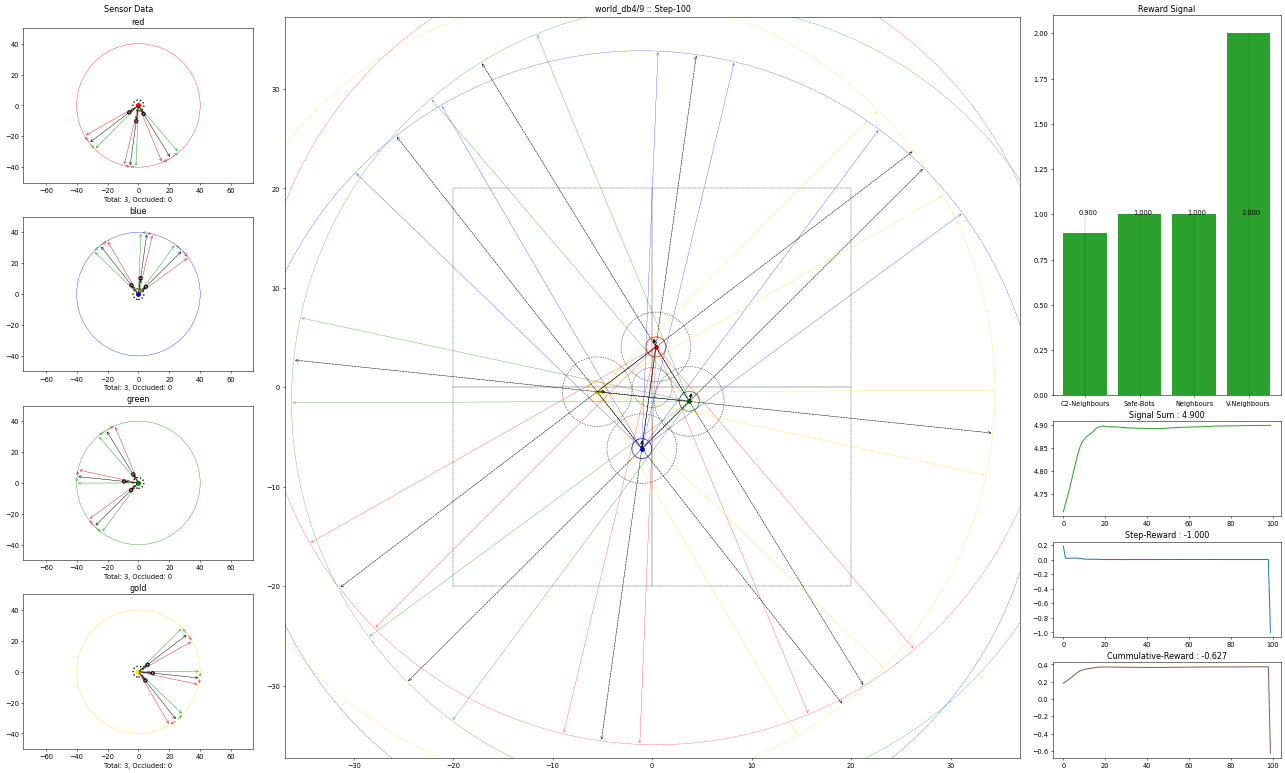

[x] End Episode: 10] :: Return: -0.6267633438110352, Steps: 100

[+] Begin Episode: 11 of 11
  [1/False]: Reward: 0.006295680999755859
  [2/False]: Reward: 0.005465507507324219
  [3/False]: Reward: 0.008486270904541016
  [4/False]: Reward: 0.009944915771484375
  [5/False]: Reward: 0.010626792907714844
  [6/False]: Reward: 0.010571479797363281
  [7/False]: Reward: 0.008983135223388672
  [8/False]: Reward: 0.007966995239257812
  [9/False]: Reward: 0.007303714752197266
  [10/False]: Reward: 0.007057666778564453
  [11/False]: Reward: 0.006978034973144531
  [12/False]: Reward: 0.007005214691162109
  [13/False]: Reward: 0.005850315093994141
  [14/False]: Reward: 0.004846096038818359
  [15/False]: Reward: 0.003986358642578125
  [16/False]: Reward: 0.002167224884033203
  [17/False]: Reward: 0.0029726028442382812
  [18/False]: Reward: 0.004046916961669922
  [19/False]: Reward: -0.16228818893432617
  [20/False]: Reward: -0.3961663246154785
  [21/False]: Reward: -0.026174545288085938
  [22/False]

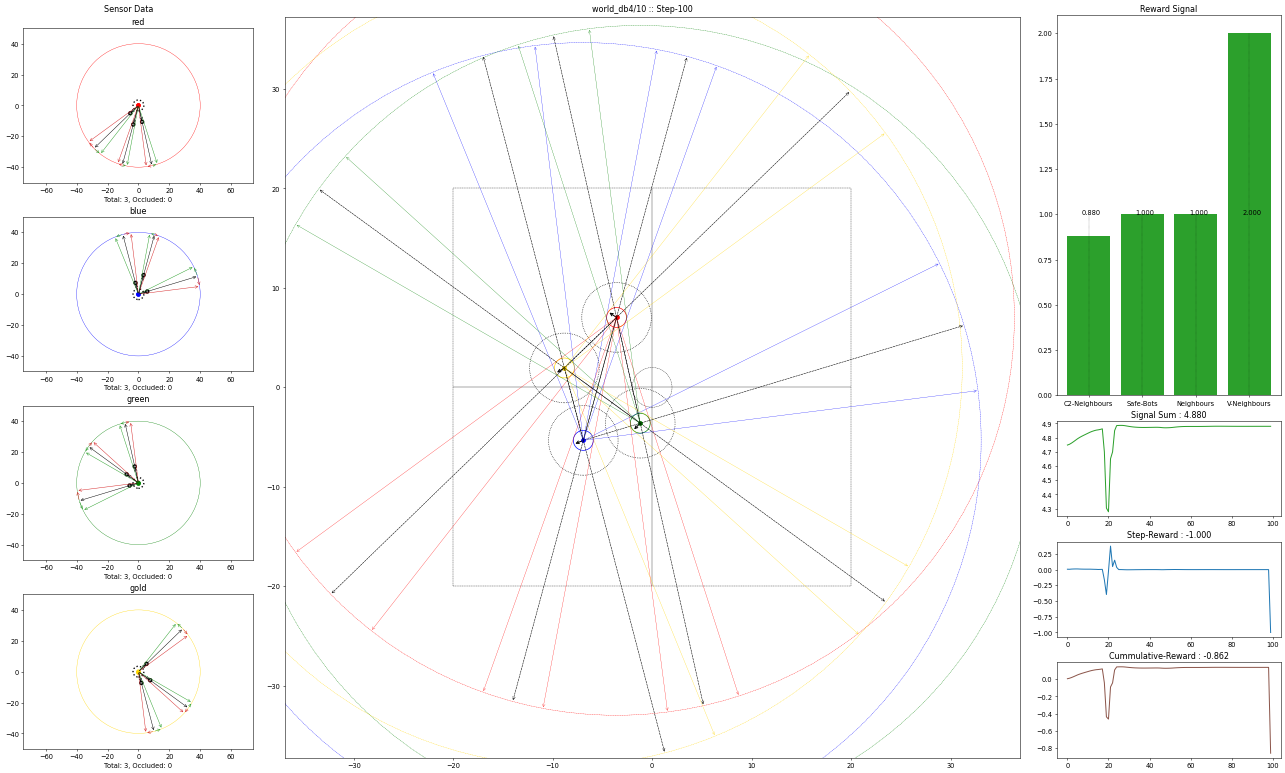

[x] End Episode: 11] :: Return: -0.8615221977233887, Steps: 100
[--] End Epoch [11] episodes :: Avg Return: -0.17127019708806818, Total Steps: 1063.0
average_return=-0.17127019708806818, total_steps=1063.0


In [8]:
print(f'Testing @ [{model_path}]')
average_return, total_steps = fb.TEST(
    env=            testing_env, 
    model=          sbalgo.load(model_path), #<---- use None for random
    episodes=       11,
    steps=          0,
    deterministic=  True,
    render_as=      'run2_test', # use None for no plots, use '' (empty string) to plot inline
    save_dpi=       'figure',
    make_video=     False,
    video_fps=      2,
    render_kwargs=dict(local_sensors=True, reward_signal=True),
    starting_state=lambda ep: ep, # either none or lambda episode: initial_state_index (int)
    plot_results=0,
    start_n=0, # for naming render pngs
    save_state_info=model_path, # call plt.show() if true
    save_both_states=False,
)
print(f'{average_return=}, {total_steps=}')


